In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df.shape

(10841, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [32]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [33]:
df.isna().sum()
df.shape

(10841, 13)

In [34]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [35]:
print(df['Reviews'].str.isnumeric().sum())
print(df['Reviews'].shape)

10840
(10841,)


In [36]:
df[~df['Reviews'].str.isnumeric()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [37]:
df_copy=df.copy()
df_copy.drop(index=10472,inplace=True)

In [38]:
#Convert 'Reviews' datatype to int
df_copy['Reviews']=pd.to_numeric(df_copy['Reviews'])
df_copy['Reviews']=df_copy['Reviews'].astype(int)


In [ ]:
df_copy = df_copy[df_copy['Size'] != 'Varies with device']  # has a lot of data which cannot be dropped
df_copy


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [40]:
df_copy[['num', 'char']] = df_copy['Size'].str.extract(r'(\d*\.?\d+)([A-Za-z]+)')
df_copy['char']=df_copy['char'].map({'M':1000,'k':1,'':1})
df_copy['num']=pd.to_numeric(df_copy['num'], errors='coerce')
df_copy['char']=pd.to_numeric(df_copy['char'], errors='coerce')
df_copy['Size'] = df_copy['num'] * df_copy['char']
df_copy.drop(columns=['num', 'char'], inplace=True)
df_copy['Size'].astype(int)




0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10835     9600
10836    53000
10837     3600
10838     9500
10840    19000
Name: Size, Length: 9145, dtype: int64

In [41]:
df_copy['Price'].unique()
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [42]:
chars_to_remove = ['$', ',', '+']
columns_to_clean = ['Price', 'Installs']

for column in columns_to_clean:
    for char in chars_to_remove:
        df_copy[column] = df_copy[column].str.replace(char, '', regex=False)

In [43]:
df_copy['Price'].unique()
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '50', '100', '500', '10', '1', '5', '1000000000', '0'],
      dtype=object)

In [44]:
df_copy['Price'] = df_copy['Price'].astype(float)
df_copy['Installs'] = df_copy['Installs'].astype(int)


In [45]:
df_copy['Last Updated'].unique

<bound method Series.unique of 0           January 7, 2018
1          January 15, 2018
2            August 1, 2018
3              June 8, 2018
4             June 20, 2018
                ...        
10835    September 29, 2016
10836         July 25, 2017
10837          July 6, 2018
10838      January 20, 2017
10840         July 25, 2018
Name: Last Updated, Length: 9145, dtype: object>

In [46]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy.shape
# df_copy['Last Updated Date'] = df_copy['Last Updated'].dt.date


(9145, 13)

In [48]:
#EDA
df=df_copy
df.shape
df.duplicated().sum()
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9600.0,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up


In [50]:
numerical_features = df.select_dtypes(include=[np.number])
# numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = df.columns.difference(numerical_features.columns)
categorical_features


Index(['Android Ver', 'App', 'Category', 'Content Rating', 'Current Ver',
       'Genres', 'Last Updated', 'Type'],
      dtype='object')

In [53]:
#Proportion of count data on categorical features
for feature in categorical_features:
    print(f"{feature} : {df[feature].nunique()} unique values")
    print(df[feature].value_counts(normalize=True)*100)
    print('---------------------------')

Android Ver : 33 unique values
Android Ver
4.1 and up            25.341792
4.0.3 and up          15.891939
4.0 and up            14.776332
4.4 and up             9.952969
2.3 and up             6.945204
5.0 and up             6.081155
4.2 and up             4.068686
2.3.3 and up           3.018703
3.0 and up             2.635896
2.2 and up             2.635896
4.3 and up             2.526523
2.1 and up             1.465602
1.6 and up             1.268730
6.0 and up             0.623428
Varies with device     0.612490
7.0 and up             0.437493
3.2 and up             0.393744
2.0 and up             0.339057
5.1 and up             0.251559
1.5 and up             0.207809
4.4W and up            0.131248
3.1 and up             0.109373
2.0.1 and up           0.076561
8.0 and up             0.065624
1.0 and up             0.021875
4.0.3 - 7.1.1          0.021875
5.0 - 8.0              0.021875
7.1 and up             0.021875
7.0 - 7.1.1            0.010937
4.1 - 7.1.1            0.0109

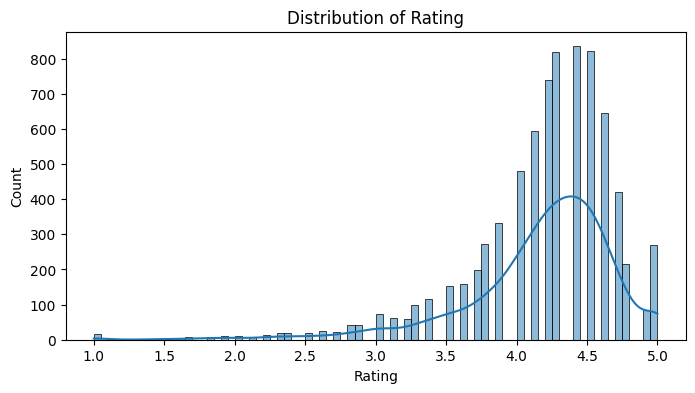

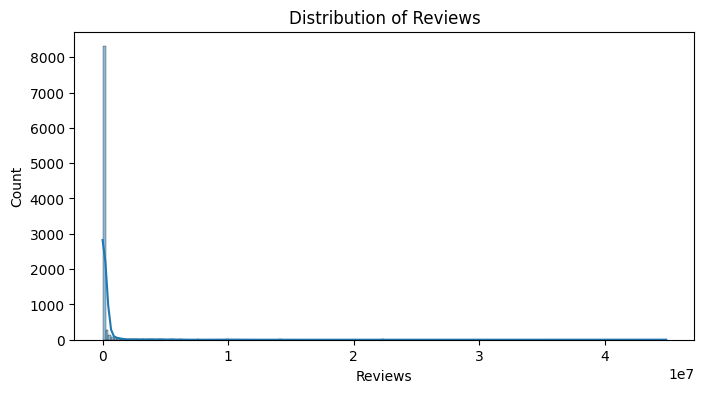

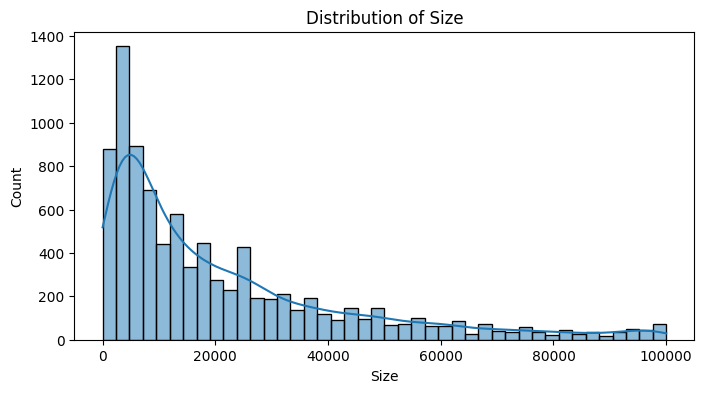

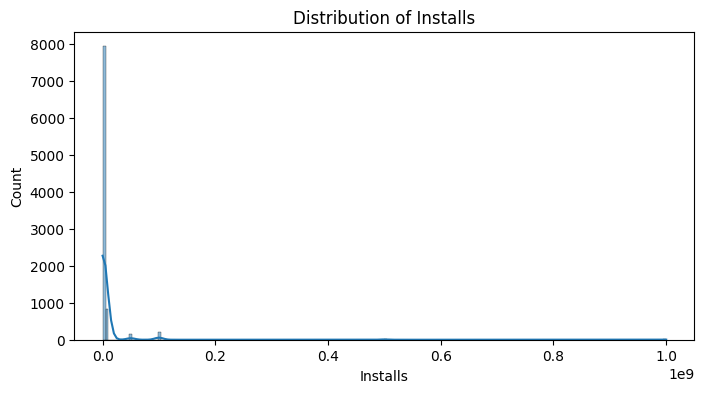

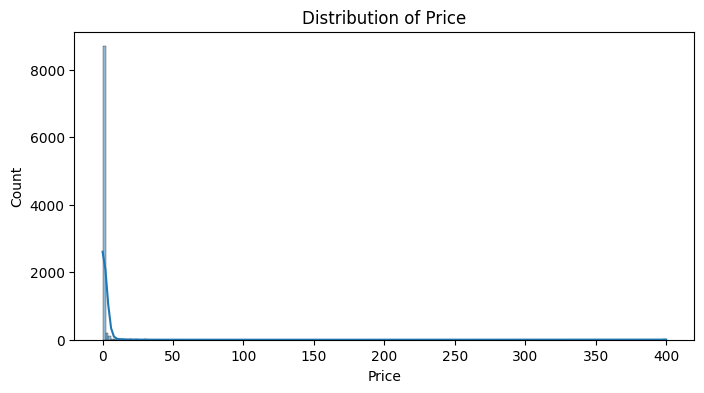

In [ ]:
import matplotlib.pyplot as plt
# Distribution plots for numerical features
for feature in numerical_features.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    

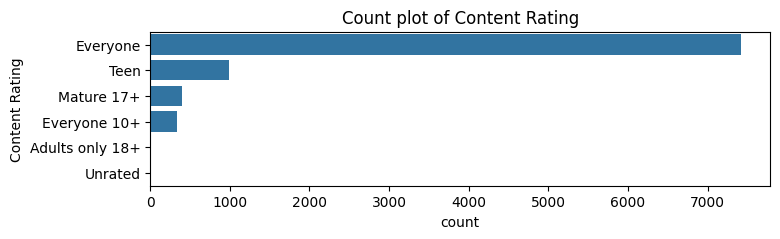

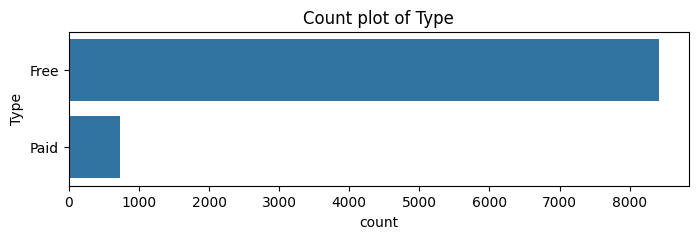

In [63]:
col=['Content Rating','Type']
i=1
for feature in col:
    plt.figure(figsize=(8,2))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count plot of {feature}')
    plt.show()
    i+=1

<Axes: ylabel='count'>

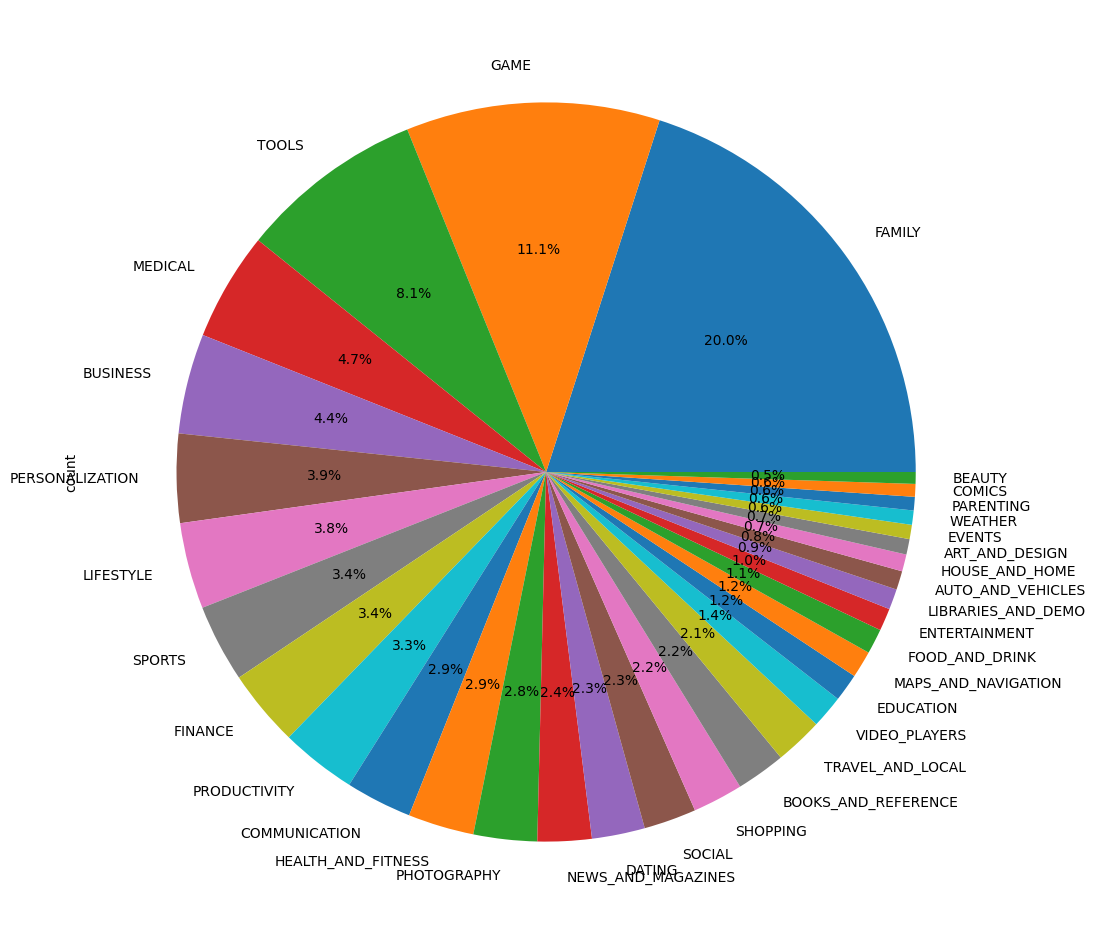

In [68]:
df['Category'].value_counts().plot(kind='pie', figsize=(12,12),autopct='%1.1f%%')

In [77]:
category=pd.DataFrame(df['Category'].value_counts())
category


,count
Category,
FAMILY,1832
GAME,1015
TOOLS,739
MEDICAL,434
BUSINESS,400
PERSONALIZATION,355
LIFESTYLE,345
SPORTS,311
FINANCE,307


KeyError: 'Category'

<Figure size 1200x600 with 0 Axes>